
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Cesar! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas de la carga de los datasets! Esto mejora la estructura y claridad de tu código.

</div>

In [3]:
ordenes = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
productos = pd.read_csv('/datasets/products.csv', sep=';')
pasillo = pd.read_csv('/datasets/aisles.csv', sep=';')
departamento = pd.read_csv('/datasets/departments.csv', sep=';')
productos_ordenados = pd.read_csv('/datasets/order_products.csv', sep=';')

In [4]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
pasillo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Es bueno incluir el parámetro `show_counts=True` al explorar el DataFrame `productos_ordenados`. Esto proporciona una visión más clara de los datos no nulos y es una buena práctica para datasets grandes.

</div>

In [8]:
productos_ordenados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Muy buen uso de métodos como _info_ y _head_ para la exploración de datos. 

</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

## En el dataframe de Pasilos y Producto coincide la dila 'aisle_id', en los dataframe Ordenes y Productos Ordenados tienen en comun la fila 'order_id'

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al incluir conclusiones intermedias sobre la vista general de los datos

</div>

Como mejora, te sugiero hablar sobre el tipo de dato y posible causa o impacto de los valores faltantes (por ejemplo, si son errores de carga, datos opcionales, etc.), así como una idea preliminar de cómo podrías tratarlos (eliminación, imputación, etc.). Esto fortalece tu análisis descriptivo inicial.

</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos

## Ejecuatr un primer diagnostico, y familiriazarse con los dataframe, saber que contienen, identificar valores ausentes y duplicados, dar el formato adecuado para un buen analizis posterior.



## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Es correcto que abordes primero los valores duplicados antes de llenar los valores ausentes. Si eliminas duplicados después, podrías haber trabajado innecesariamente en filas que no eran relevantes para el análisis. Esto te permite ahorrar tiempo y esfuerzo mientras aseguras que los datos sean consistentes desde el principio.

</div>

In [9]:
ordenes.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [10]:
ordenes[ordenes.duplicated(keep=False)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
99462,794638,50898,24,3,2,2.0
119251,408114,68324,4,3,2,18.0
142258,2845099,31189,11,3,2,7.0
145574,794638,50898,24,3,2,2.0
164581,1112182,202304,84,3,2,6.0
200059,1782114,106752,1,3,2,NaN
204042,2125197,14050,48,3,2,3.0
215294,2160484,107525,16,3,2,30.0
223105,2160484,107525,16,3,2,30.0


In [11]:
ordenes_dp = ordenes[ordenes.duplicated()]
print("DOW verification:", ordenes_dp['order_dow'].unique())
print("HR verification", ordenes_dp['order_hour_of_day'].unique())

DOW verification: [3]
HR verification [2]


¿Qué sugiere este resultado?
## Los dias mas activos son los miercoles, y la hora mas saturada son las 2

In [12]:
# Elimina los pedidos duplicados
ordenes_limpias = ordenes.drop_duplicates(keep='first')

In [13]:
# Vuelve a verificar si hay filas duplicadas
ordenes_limpias.duplicated().sum()

0

In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
ordenes_limpias['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo al identificar los duplicados en `orders`, especialmente aquellos relacionados con pedidos realizados a las 2:00 AM los miércoles! 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda aplicar `.reset_index(drop=True)` después de `.drop_duplicates()`, lo cual es una buena práctica.

Además, podrías mantener los cambios en el propio dataset `ordenes` para no tener que trabajar con tantos datasets distintos.

</div>

</div>

### `products` data frame ###

In [15]:
# Verifica si hay filas totalmente duplicadas
productos[productos.duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id


In [16]:
# Verifica si hay filas totalmente duplicadas
print(f"Filas completamnente duplicadas: {productos.duplicated().sum()}")

Filas completamnente duplicadas: 0


In [17]:
# Revisa únicamente si hay ID de productos duplicados
productos['product_id'].duplicated().sum()

0

In [18]:
productos.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [19]:
productos['product_name'] = productos['product_name'].str.upper()


In [20]:
# Revisa si hay nombres duplicados de productos no faltantes
productos['product_name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool

In [21]:
productos_limpios = productos.drop_duplicates('product_name')

In [22]:
productos_limpios['product_name'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

##  Teneiamos 37 duplicados en la fila 'product_name' y se eliminaron con funcion drop_duplicates()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

En este paso lo importante es detectar que hay productos con el mismo nombre, pero distintos ID's de producto. Probablemente son productos diferentes por lo que no se tratan como duplicados, luego, la tabla `products` no contiene realmente valores duplicados. 

Pero lo interesante es realizar este análisis.

</div>

### `departments` data frame 

In [23]:
# Revisa si hay filas totalmente duplicadas
departamento[departamento.duplicated(keep=False)]

,department_id,department


In [24]:
departamento.columns

Index(['department_id', 'department'], dtype='object')

In [25]:
# Revisa si hay filas totalmente duplicadas
print(f"Filas completamnente duplicadas: {departamento.duplicated().sum()}")

Filas completamnente duplicadas: 0


In [26]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departamento['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

##Esta infromacion esta limpia y sera facil de manejar, ademas de que es un dataframe con pocas columnas.

### `aisles` data frame ###

In [27]:
# Revisa si hay filas totalmente duplicadas
pasillo[pasillo.duplicated(keep=False)]

,aisle_id,aisle


In [28]:
# Revisa si hay filas totalmente duplicadas
print(f"Filas completamnente duplicadas: {pasillo.duplicated().sum()}")

Filas completamnente duplicadas: 0


In [29]:
# Revisa únicamente si hay IDs duplicadas de pasillos
pasillo['aisle_id'].duplicated(keep=False).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

##Aquí tambie tenemos datos limpios y pocas columnas

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto, no hay duplicados en _departments_ ni en _aisles_. 

</div>

### `order_products` data frame

In [30]:
productos_ordenados.duplicated(keep=False).sum()


0

In [31]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(f"Duplicados por order_id: {productos_ordenados['order_id'].duplicated().sum()}")
print(f"Duplicados por order_id + product_id: {productos_ordenados.duplicated(subset=['order_id', 'product_id']).sum()} ")

Duplicados por order_id: 4094961
Duplicados por order_id + product_id: 0 


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Bien hecho al verificar duplicados en el subconjunto `['order_id', 'product_id']`! Esto asegura que cada producto esté correctamente asignado a un pedido.

</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos
## En este dataframe solo tego duplicados legitimos, los cuales encontre con la combinacion de las columnas order_id + product_id, los duplicados por order_id son completamente esperados por que un pedido puede tener varios articulos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

Describe brevemente cuáles son tus hallazgos.

In [32]:
productos['product_name'].isnull().sum()

1258

In [33]:
ordenes['days_since_prior_order'].isnull().sum()

28819

In [34]:
productos_ordenados['add_to_cart_order'].isnull().sum()

836

Describe brevemente cuáles son tus hallazgos.
## Tenemos decaiados valores ausentes, pero no considero una buena idea borrarlos, seria mejor remplazarlso por algun tipo de dato que me resulte util mas adelante 

In [35]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con Iproductos
productos_sin_nombre = productos[productos['product_name'].isnull()]
productos_sin_nombre['aisle_id'].value_counts()
print(productos_sin_nombre)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [36]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21
productos_ausentes = productos[productos['product_name'].isnull()]
productos_ausentes['department_id'].unique()
print(productos_ausentes)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
## Me parece que encontre un patron, todos los nombres ausentes coinciden con el pasillo 100 y el departamento 21, creo que estos articulos son algo como epecial, son articulos sin clasificacion especifica.

In [37]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.= 100
productos = productos[(productos['department_id'] == 21) & (productos['aisle_id'] == 100)]
print(productos)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [38]:
productos_filtrados = productos[(productos['department_id'] == 21) & (productos['aisle_id'] == 100)]
print(f"Total de productos: {len(productos_filtrados)}")

Total de productos: 1258


Describe brevemente cuáles son tus hallazgos.
## Efectivamente, el pasillo 100 y el departamento 21 son usados para articulos sin tratameinto 

In [39]:
# Completa los nombres de productos ausentes con 'Unknown'
productos['product_name'] = productos['product_name'].fillna('Unknown')
print(productos)

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.
## El dataframe se quedo casi intacto, y al usar la pabra unknow sera mas facil identificar los productos especiales 

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo al identificar los valores ausentes en `product_name` y asociarlos con las columnas `aisle_id` y `department_id`! Reemplazar estos valores con `'Unknown'` es una decisión lógica y adecuada.

</div>

### `orders` data frame

In [40]:
# Encuentra los valores ausentes
ordenes.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [41]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
no_es_primera_orden = ordenes[ordenes['order_number'] > 1]
no_es_primera_orden['days_since_prior_order'].isnull().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

##Al parecer solo tenmos datos ausentes en la columna 'days_since_prior_order'.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Los valores ausentes en `days_since_prior_order` corresponden a filas donde `orders['order_number'] == 1`. Esto tiene sentido porque no existe un pedidio anterior. En este caso, dejar `NaN` o usar un valor adecuado es importante, ya que reemplazarlo con 0 puede ser engañoso.

</div>

### `order_products` data frame

In [42]:
# Encuentra los valores ausentes
productos_ordenados.isnull().sum()


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [43]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valor_minimo = productos_ordenados['add_to_cart_order'].min()
valor_maximo = productos_ordenados['add_to_cart_order'].max()
print(valor_minimo)
print(valor_maximo)

1.0
64.0


Describe brevemente cuáles son tus hallazgos.
## Tenemos muchos valores ausentes en una sola columna,  y minimos creo aceptables, pero un maximo que me hace dudar un poco.

In [44]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
valores_ausentes = productos_ordenados['add_to_cart_order'].isnull()
id_perdidos = productos_ordenados.loc[valores_ausentes, 'order_id']
print(id_perdidos)


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [45]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
pedidos_con_ausentes = productos_ordenados[productos_ordenados['add_to_cart_order'].isnull()]['order_id'].unique()
print(f"Numero de pedidos con valores ausentes: {len(pedidos_con_ausentes)}")

conteo_productos = productos_ordenados[productos_ordenados['order_id'].isin(pedidos_con_ausentes)].groupby('order_id').size()
print(conteo_productos)
print()
print(f"Promedio de productos: {conteo_productos.mean():2f}")
print(f"Mediana:{conteo_productos.median()}")

Numero de pedidos con valores ausentes: 70
order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

Promedio de productos: 75.942857
Mediana:71.0


In [46]:
# Verificar que los pedidos SIN valores ausentes tienen ≤64 productos
pedidos_sin_ausentes = productos_ordenados[productos_ordenados['add_to_cart_order'].notnull()]['order_id'].unique()
conteo_sin_ausentes = productos_ordenados[productos_ordenados['order_id'].isin(pedidos_sin_ausentes)].groupby('order_id').size()
print(f"Máximo productos en pedidos sin ausentes: {conteo_sin_ausentes.max()}")

Máximo productos en pedidos sin ausentes: 127


In [47]:
ordenes[ordenes['order_id'].isin(pedidos_con_ausentes)]['order_dow'].value_counts()
print()
# Ver distribución por día de la semana para pedidos CON ausentes
print("Pedidos CON valores ausentes por día de la semana:")
print(ordenes[ordenes['order_id'].isin(pedidos_con_ausentes)]['order_dow'].value_counts().sort_index())

print("\n" + "="*50 + "\n")

# Ver distribución por día de la semana para pedidos SIN ausentes  
pedidos_sin_ausentes = productos_ordenados[productos_ordenados['add_to_cart_order'].notnull()]['order_id'].unique()
print("Pedidos SIN valores ausentes por día de la semana:")
print(ordenes[ordenes['order_id'].isin(pedidos_sin_ausentes)]['order_dow'].value_counts().sort_index())



Pedidos CON valores ausentes por día de la semana:
0     7
1    17
2    10
3    13
4     5
5    13
6     5
Name: order_dow, dtype: int64


Pedidos SIN valores ausentes por día de la semana:
0    77970
1    77883
2    62266
3    57441
4    56294
5    59701
6    58506
Name: order_dow, dtype: int64


Describe brevemente cuáles son tus hallazgos.

## Todos los pedidos con valores ausentes tienen un mas de 64 articulos, pordira ser que el sistema tenga algun tipo de problema o limitacion.

# Resumen de hallazgos:
1; 70 pedidos con valores ausentes
2; Rangos de 64 - 127 productos por pedido 
3; Promedio de 75.9 articulos 
4; Mediana 71 productos 

## Los pedidios SIN valores ausentes tambien pueden tener hasta 127 productos, la limitacion de 64 productos NO es la causa de los valores ausentes en 'add_to_cart_order'

## Existe un patron, el hecho de que los pedidos CON valores ausentes ocurran más los lunes y los pedidos SIN ocurran más los domingos sugiere que hay algo sistematico detrás de estos valores faltantes. Los valores ausentes no son aleatorios, estan relacionados con el día de la semana. 

In [48]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

productos_ordenados['add_to_cart_order'] = productos_ordenados['add_to_cart_order'].fillna(999).astype(int)
# Antes del cambio
print("Valores faltantes antes:", productos_ordenados['add_to_cart_order'].isna().sum())

# Después del cambio
print("Valores faltantes después:", productos_ordenados['add_to_cart_order'].isna().sum())
print("Tipo de datos:", productos_ordenados['add_to_cart_order'].dtype)

Valores faltantes antes: 0
Valores faltantes después: 0
Tipo de datos: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos

## Al encontrar los valores ausentes me parecio buena idea tomar la sugerencia de usar un numero facil de identificar como 999, me parecio una buena idea mostra como se ve el anbtes y el despues de hacer los cambios, y asi mostrar que los cambios y correcciones se hacen deacuerdo a lo que se pide en las intrucciones.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

## Es buena idea, profundizar un poco a la hora de procesar, pero siempre es una buena practica responder claro y conciso, tene mos muchso valores ausentes y columnas en comun el los data frame, asi que espero usarlos para la siguente parte del proceso.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo!

Un valor mínimo de 1 tiene sentido porque cada pedido necesita, al menos, 1 artículo. Pero, un valor máximo de 64 resulta un tanto curioso. No hay ninguna razón (que no sea mera suerte) para que cualquiera pidiera más de 64 artículos en un pedido.

Además, 64 enciende las alarmas porque es un número de base 2 muy común que surgen con asuntos de informática. Esta es una pista de que quizás el tipo database para esa columna solo admite almacenamiento de 64 bits.

Luego, como era de esperarse, cada pedido relacionado con un valor ausente tiene más de 64 artículos en ella.

Ya que no podemos saber en qué pedido se agregaron al carrito los artículos con valores ausentes para aquellos pedidos con más de 65 artículos, lo correcto es completar los valores ausentes con un valor de marcador de posición numérico que no pueda confundirse con daros reales; por ejemplo, 999.

</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles ###

In [49]:
ordenes[(ordenes['order_hour_of_day'] >= 0) & (ordenes['order_hour_of_day'] <= 23) & 
   (ordenes['order_dow'] >= 0) & (ordenes['order_dow'] <= 6)].shape

print("Tamaño original:", ordenes.shape)

filas_validas = ordenes[(ordenes['order_hour_of_day'] >= 0) & (ordenes['order_hour_of_day'] <= 23) & 
                       (ordenes['order_dow'] >= 0) & (ordenes['order_dow'] <= 6)].shape
print("Filas con valores válidos:", filas_validas)

Tamaño original: (478967, 6)
Filas con valores válidos: (478967, 6)


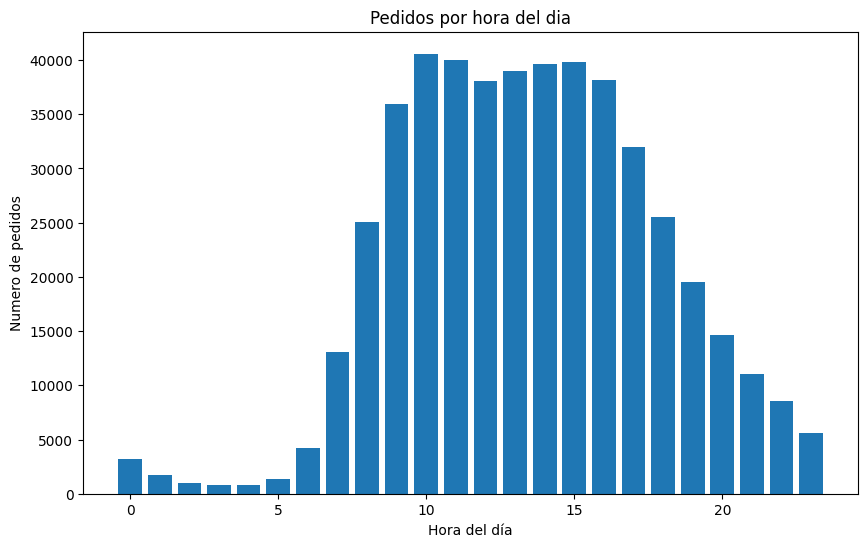

In [50]:
pedidos_por_hora = ordenes.groupby('order_hour_of_day')['order_id'].count()
plt.figure(figsize=(10,6))
plt.bar(pedidos_por_hora.index, pedidos_por_hora.values)
plt.xlabel('Hora del día')
plt.ylabel('Numero de pedidos')
plt.title('Pedidos por hora del dia')
plt.show()
                                                                         

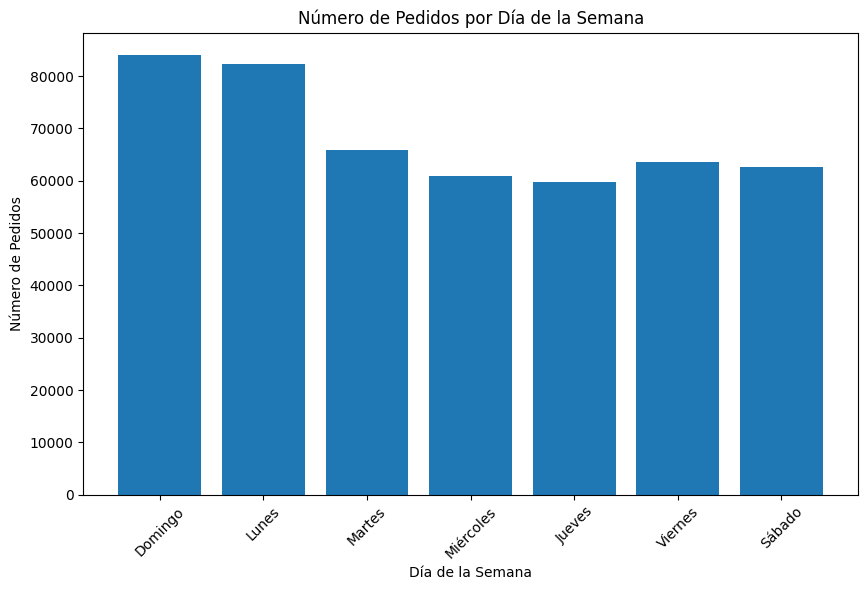

In [51]:
pedidos_por_dia = ordenes['order_dow'].value_counts().sort_index()

dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

plt.figure(figsize=(10, 6))
plt.bar(dias_semana, pedidos_por_dia.values)
plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

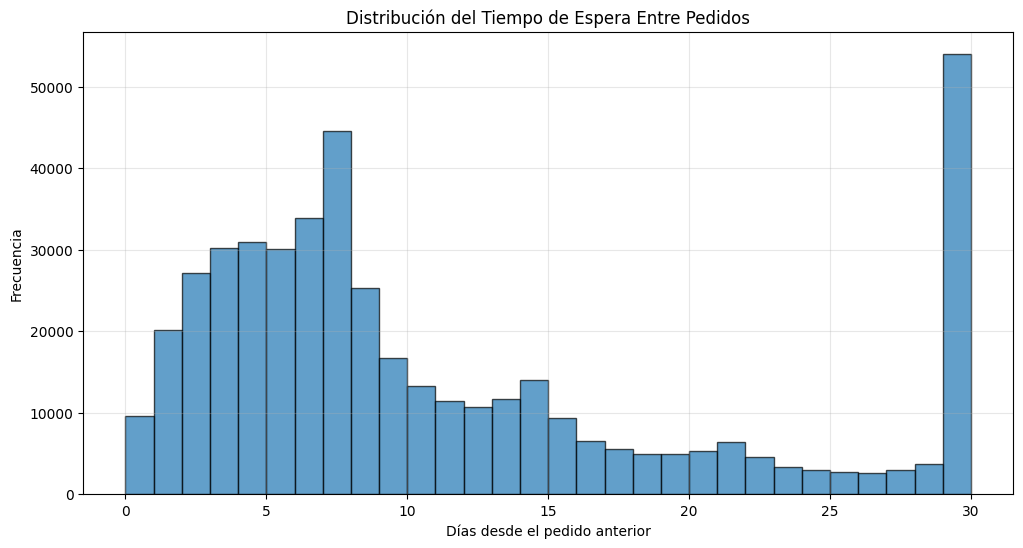

Valor mínimo: 0.0 días
Valor máximo: 30.0 días
Promedio: 11.10 días


In [52]:
dias_espera = ordenes['days_since_prior_order'].dropna()

plt.figure(figsize=(12, 6))
plt.hist(dias_espera, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución del Tiempo de Espera Entre Pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()


print(f"Valor mínimo: {dias_espera.min()} días")
print(f"Valor máximo: {dias_espera.max()} días")
print(f"Promedio: {dias_espera.mean():.2f} días")


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo revisando los valores únicos! Aunque luego realizas algunos plots que vuelves a utilizar luego, lo que es un poco redundante.

</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

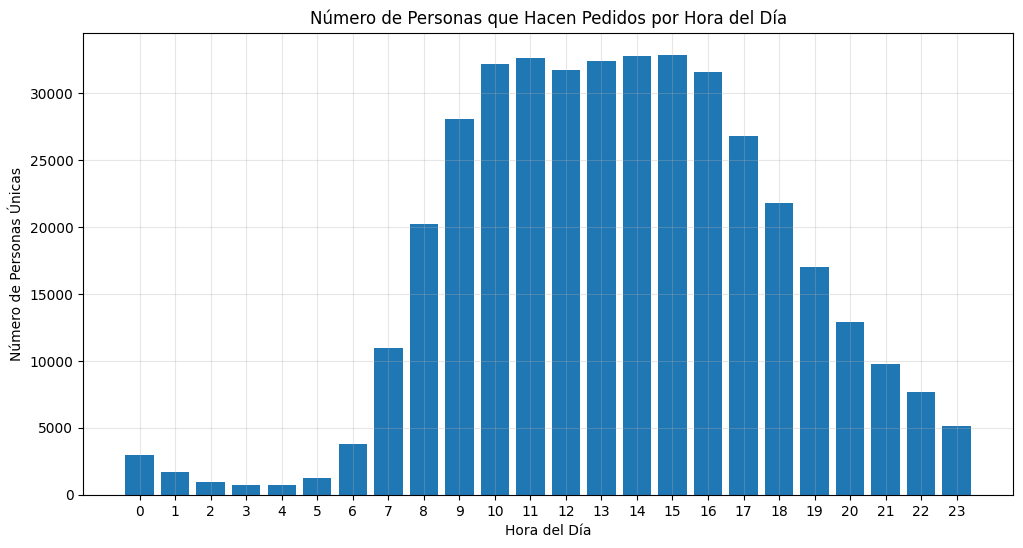

In [53]:
personas_por_hora = ordenes.groupby('order_hour_of_day')['user_id'].nunique()

plt.figure(figsize=(12, 6))
plt.bar(personas_por_hora.index, personas_por_hora.values)
plt.title('Número de Personas que Hacen Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Personas Únicas')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

Escribe aquí tus conclusiones

## Los picos registrados son entre las 10 am y las 3 pm, lo que me hace pensar que la gente aprobecaha su hora de almuerzo o la hora de salida de su turno, tambien contamos con actividad a media noche y aunque poca esto sugiere que el sistema siemrpe esta activo y recibiendo pedidos, se puede aprovechar este tiempo para realizar diagnosticos del sistema y encontrar donde esta la liminitante mencionada anteriormente. Los lunes y domingos son los día mas activos, lo cual nos dice que los clientes buscan iniciar su semana laboral con el refrigerador lleno, y es una verdadera sorpresa que la mayoria de clientes hacen sus pedidos por mes, ya que el punto mas alto de espera nos da un total de 30 días, y el segundo un estimado de 7 a 8


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo al usar un gráfico de barras para visualizar los datos! Además, la comunicación de los resultados es clara y precisa: identificaste correctamente que la mayoría de los pedidos ocurren entre las 9:00 AM y las 5:00 PM, con picos a las 10:00 AM y las 3:00 PM. Esto proporciona una gran perspectiva sobre el comportamiento del cliente.

</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

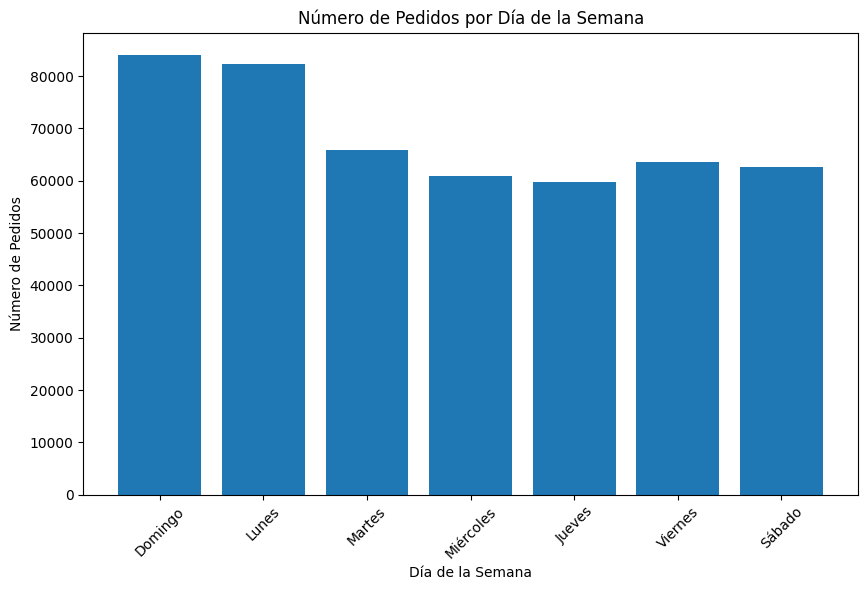

In [54]:
pedidos_por_dia = ordenes['order_dow'].value_counts().sort_index()

dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

plt.figure(figsize=(10, 6))
plt.bar(dias_semana, pedidos_por_dia.values)
plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

Escribe aquí tus conclusiones

## Los dias mas activos son de esperarce los domingos y los lunes, cosa que pudiera resultar natural ya que la gente aprovecha los dias de pago  de descanso para organizar sus compras de la semana.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El uso de un gráfico de barras para representar los datos es acertado y ayuda a visualizar las tendencias claramente. Tu comunicación de resultados también es precisa: identificaste correctamente que, asumiendo que el domingo es 0, la mayoría de los pedidos se realizan el domingo y el lunes.

</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Estadísticas del tiempo de espera:
Valor mínimo: 0.0 días
Valor máximo: 30.0 días
Promedio: 11.10 días
Mediana: 7.0 días


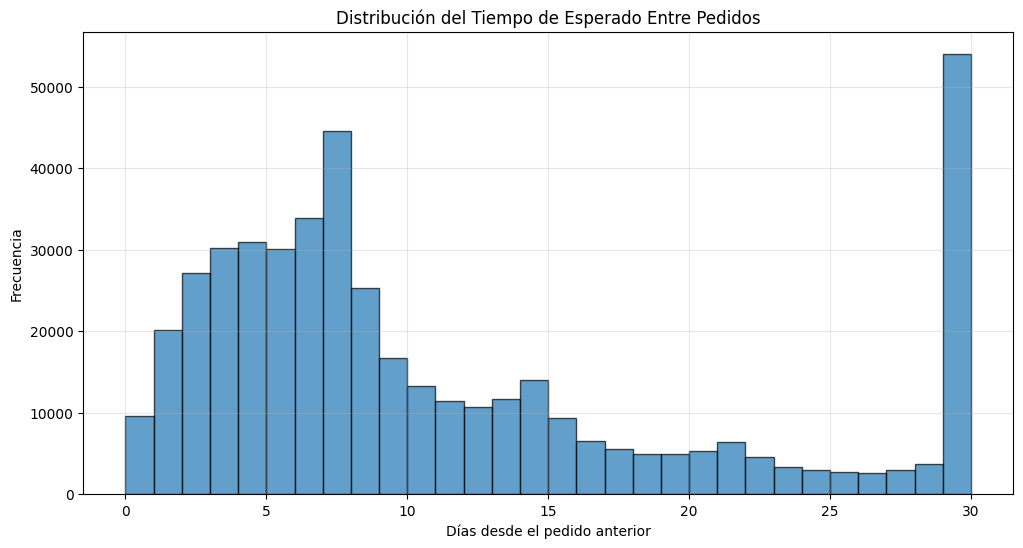

In [55]:
dias_esperados = ordenes['days_since_prior_order'].dropna()

print("Estadísticas del tiempo de espera:")
print(f"Valor mínimo: {dias_esperados.min()} días")
print(f"Valor máximo: {dias_esperados.max()} días")
print(f"Promedio: {dias_esperados.mean():.2f} días")
print(f"Mediana: {dias_esperados.median()} días")

plt.figure(figsize=(12, 6))
plt.hist(dias_espera, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución del Tiempo de Esperado Entre Pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

Escribe aquí tus conclusiones

## Algo sorprendente es que hay una espera de 30 días muy elevada, y solo le sigue la espera de 7 a 8 días y aunque el promedio arrojado por el codigo es de 11 dias, tambien puede influir el pago quincenal.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al visualizar los datos! Además, tu interpretación de los resultados es sólida

</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [56]:
filtro_miercoles = ordenes['order_dow'] == 3
print("Cantidad de miércoles encontrados:", filtro_miercoles.sum())

datos_miercoles = ordenes[filtro_miercoles]
print("Filas filtradas para miércoles:", len(datos_miercoles))

horas_miercoles = datos_miercoles['order_hour_of_day']
print("Primeras 5 horas de miércoles:", horas_miercoles.head())

filtro_sabado = ordenes['order_dow'] == 6
print("Cantidad de sabado encontrados:", filtro_sabado.sum())

datos_sabado = ordenes[filtro_sabado]
print("Filas filtradas para sabado:", len(datos_sabado))

horas_sabado = datos_sabado['order_hour_of_day']
print("Primeras 5 horas de sabado:", horas_sabado.head())

Cantidad de miércoles encontrados: 60912
Filas filtradas para miércoles: 60912
Primeras 5 horas de miércoles: 6      8
16    15
28    10
30    15
35    19
Name: order_hour_of_day, dtype: int64
Cantidad de sabado encontrados: 62649
Filas filtradas para sabado: 62649
Primeras 5 horas de sabado: 0     13
11    16
14    11
20     9
26    18
Name: order_hour_of_day, dtype: int64


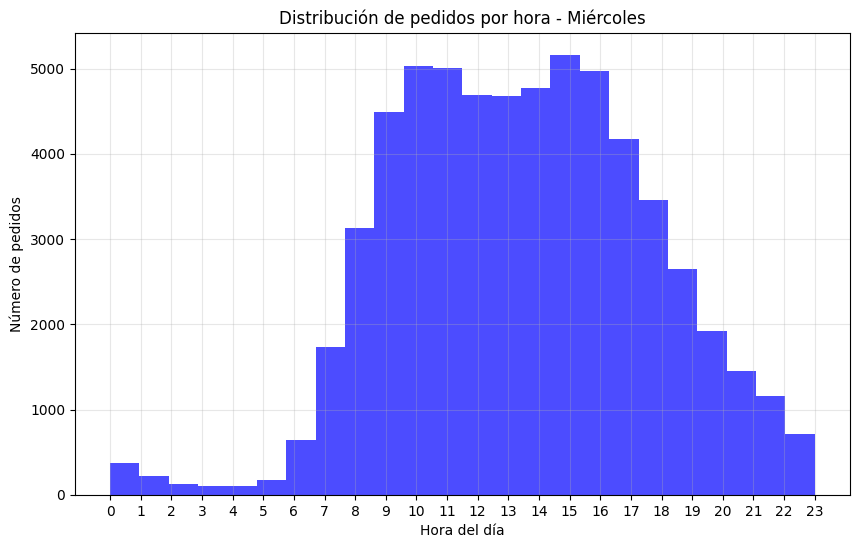

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(horas_miercoles, bins=24, color='blue', alpha=0.7)
plt.title('Distribución de pedidos por hora - Miércoles')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24, 1))  #mostrar por hora
plt.grid(True, alpha=0.3)
plt.show()

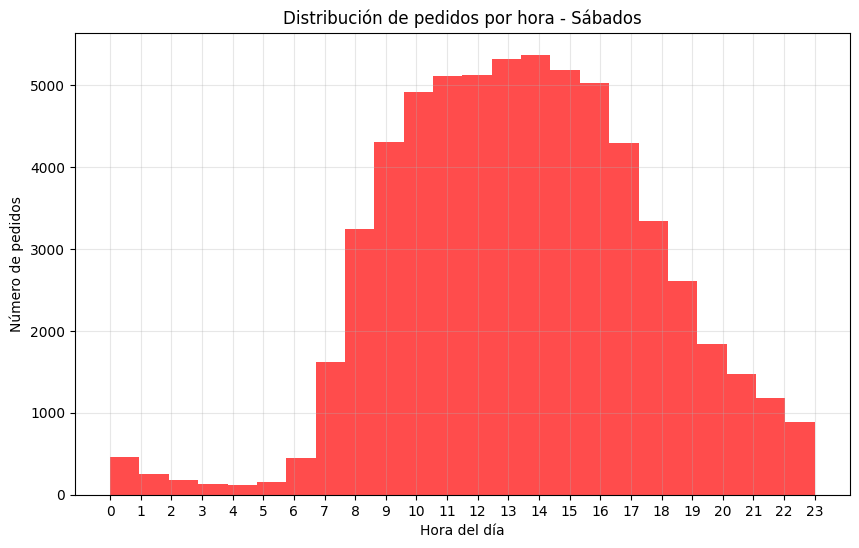

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(horas_sabado, bins=24, color='red', alpha=0.7)
plt.title('Distribución de pedidos por hora - Sábados')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24, 1))  #mostrar por hora
plt.grid(True, alpha=0.3)
plt.show()

Escribe aquí tus conclusiones
## Es de esperar que los miercoles sean activos en lo que podria ser la hora del desayuno, y que los sabados empiecen tarde casi medio dia, auqneue los abados la actividad empieza a disminuir depues de las cuatro, suponiendo que es la hora en la que la mayoria de clientes empieza a salir o descansar. 
## Las noches son tranquilas en ambos días, las madrugadas son casi inactivas, lo que podria dar un perniso para trabajar en las limitaciones mencionadas y asi mejorar la experiencia de compra.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Identificaste correctamente una ligera disminución entre las 11h y las 13h los miércoles, que está ausente los sábados.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Como posible mejora, podrías superponer ambos plots para que se vean diréctamente las diferencias. 

</div>

    
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

149605    28
193164    26
78375     25
134511    24
148162    24
          ..
166116     1
170214     1
63564      1
51274      1
2047       1
Name: user_id, Length: 157437, dtype: int64




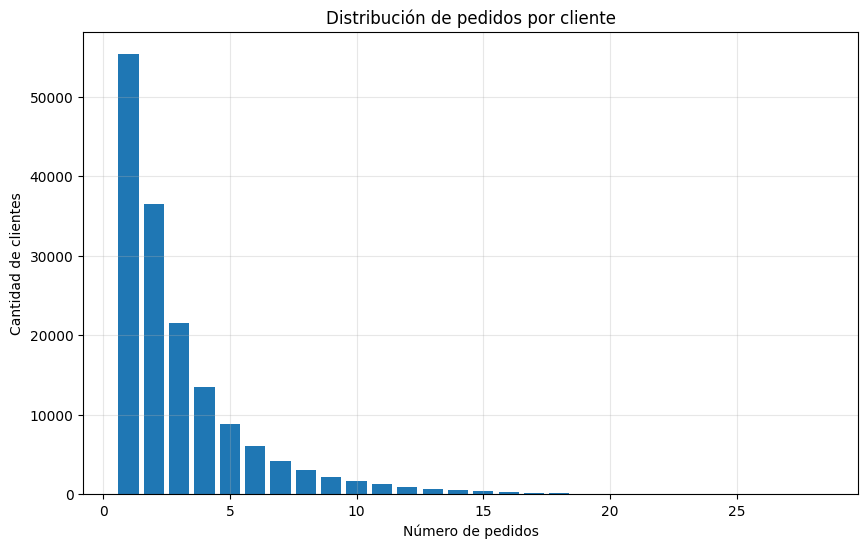

In [59]:
pedidos_por_cliente = ordenes['user_id'].value_counts()
distribucion_de_pedidos = pedidos_por_cliente.value_counts().sort_index()
print(pedidos_por_cliente)
print()
pedidos_por_cliente.value_counts()
print()
plt.figure(figsize=(10, 6))
plt.bar(distribucion_de_pedidos.index, distribucion_de_pedidos.values)
plt.title('Distribución de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Cantidad de clientes')
plt.grid(True, alpha=0.3)
plt.show()

Escribe aquí tus conclusiones
## Tenemos clientes que realizan hasta 28 pedidso, pero la gran mayoria solo realiza uno, esyo refuerza el comentario anterior. 

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo Cesar!

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Un histograma es adecuado cuando se desea analizar la distribución de un conjunto de datos continuos, es decir, aquellos que pueden tomar cualquier valor dentro de un rango. Se utiliza para representar la frecuencia con la que ocurren ciertos valores dentro de intervalos o clases, permitiendo identificar patrones como la simetría, la dispersión o la presencia de sesgos en los datos. Es especialmente útil en estadística para entender cómo se distribuyen variables como alturas, edades, tiempos de espera o calificaciones en un examen. A diferencia del gráfico de barras, en el histograma las barras están juntas, ya que los datos representados son continuos y no categorías separadas.

</div>

</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [60]:
productos_ordenados['product_id'].value_counts().head(20)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64

In [61]:

top_products = productos_ordenados['product_id'].value_counts().head(21).reset_index()
top_products_with_names = top_products.merge(productos_limpios, on='product_id')
print("Top 20 productos más populares:")
print(top_products_with_names)

Top 20 productos más populares:
    index  product_id                                       product_name  \
0   21137       37039                                    SHIRAZ CABERNET   
1   21903       33971                                      SLIDERS ROLLS   
2   47766       24689         WITH OLIVE OIL SQUEEZE MAYONNAISE DRESSING   
3   47626       21495                        EXTRA EXTRA DRY ULTRA FRESH   
4   16797       20018                                        CHEESE BUNS   
5   26209       19690                                  GREEN OAK LETTUCE   
6   27845       19600   CLASSIC MEAL FOR 2 CHICKEN FLORENTINE & FARFALLE   
7   27966       19197            SHOW ME THE HONEY CRUNCHY COCONUT CHIPS   
8   22935       15898  MANGO PEACH OMEGA SWIRL OMAGE-3 FISH OIL SUPPL...   
9   24964       15292                           MADE VITAMIN D3 1000 I.U   
10  45007       14584  CHEWY CHOCOLATE MADE WITH REESE'S PEANUT BUTTE...   
11  39275       13879                      ORGANIC GREEN

In [62]:
conteo_desconocido = productos_limpios[productos_limpios['product_name'] == 'Unknown'].shape[0]
total_de_productos = productos_limpios.shape[0]
print(f"Productos con nombres desconocidos: {conteo_desconocido} de {total_de_productos}")

Productos con nombres desconocidos: 0 de 48333


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Los productos populares se listan correctamente. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

En el análisis de productos más populares ([B3]), sería útil añadir una visualización tipo gráfico de barras para complementar la tabla y facilitar una lectura rápida del ranking. Esto también permitiría detectar patrones visuales como posibles productos muy por encima del resto.

</div>

</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [63]:
articulos_por_pedido = productos_ordenados.groupby('order_id')['product_id'].count()
print(articulos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


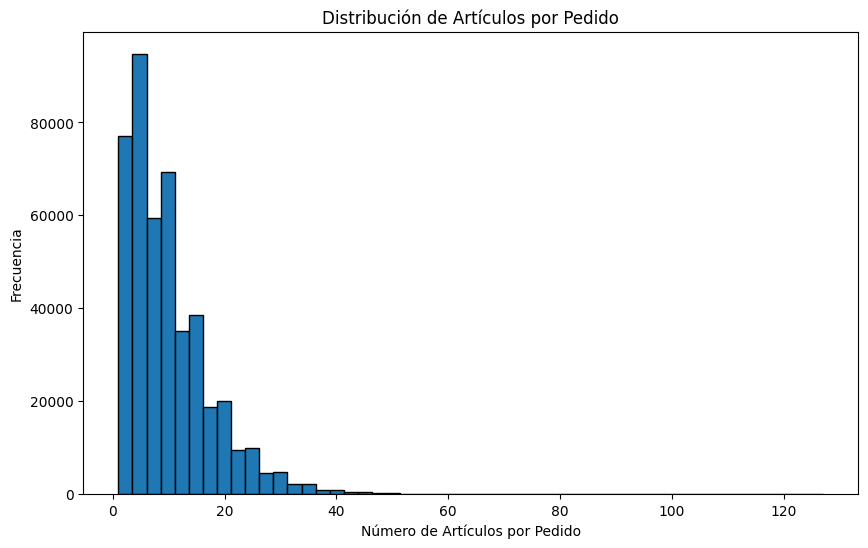

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(articulos_por_pedido, bins=50, edgecolor='black')
plt.title('Distribución de Artículos por Pedido')
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones
## El promedio y la media dicen mucho, y anqué es cierto que pueden existir pedidos grandes que pueden alterar estos resultados, deben ser muy esporádicos y sobre todo deben estar dentro de del promedio o con un valor poco significativo para alterarlo.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [65]:
productos_ordenados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


In [66]:
conteo_reordenado = productos_ordenados[productos_ordenados['reordered'] == 1]['product_id'].value_counts()
print(conteo_reordenado)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
2591         1
29201        1
27154        1
10789        1
2049         1
Name: product_id, Length: 36228, dtype: int64


In [67]:
resultado_top20 = conteo_reordenado.head(20)
print(resultado_top20)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [68]:
productos_ordenados.merge(productos_limpios, on='product_id', how='left').head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129.0,1.0
1,567889,1560,1,1,BAG OF ICE,37.0,1.0
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91.0,16.0
3,491251,8670,35,1,DICED TOMATOES,81.0,15.0
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84.0,16.0
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123.0,4.0
6,644579,12341,5,1,HASS AVOCADOS,32.0,4.0
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21.0,16.0
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117.0,19.0
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26.0,7.0


Escribe aquí tus conclusiones
## La mayoria son productos poerecederos.

In [69]:
# Ver cuántos productos SÍ tienen match
resultado = productos_ordenados.merge(productos_limpios, on='product_id', how='inner')
print(f"Productos con nombre disponible: {len(resultado)}")
print()
# Mostrar solo los productos que SÍ tienen nombre
productos_con_nombre = productos_ordenados.merge(productos_limpios, on='product_id', how='inner')
productos_con_nombre.head(20)

Productos con nombre disponible: 4524195



,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
5,847715,11440,13,0,CHICKEN BREAST TENDERS BREADED,129,1
6,1463503,11440,1,0,CHICKEN BREAST TENDERS BREADED,129,1
7,331884,11440,5,1,CHICKEN BREAST TENDERS BREADED,129,1
8,1869056,11440,12,1,CHICKEN BREAST TENDERS BREADED,129,1
9,1772832,11440,3,1,CHICKEN BREAST TENDERS BREADED,129,1


In [70]:
# Ver si hay productos que NO sean "Unknown"
productos_reales = productos_limpios[productos_limpios['product_name'] != 'Unknown']
print(f"Productos con nombres reales: {len(productos_reales)}")
if len(productos_reales) > 0:
    print(productos_reales.head())

Productos con nombres reales: 48333
   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Los análisis se realizan correctamente.

</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [92]:
productos_ordenados.groupby('product_id')['reordered'].mean()*100

product_id
1        56.428571
2         0.000000
3        73.809524
4        51.020408
7        50.000000
           ...    
49690    80.000000
49691    43.055556
49692    41.666667
49693    44.000000
49694    33.333333
Name: reordered, Length: 45573, dtype: float64

In [72]:
proporciones = productos_ordenados.groupby('product_id')['reordered'].mean().reset_index()
proporciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45573 entries, 0 to 45572
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  45573 non-null  int64  
 1   reordered   45573 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 712.2 KB


In [77]:
proporciones.merge(productos_limpios, on='product_id', how='inner').info()
proporciones.merge(productos_limpios, on='product_id', how='inner').head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44516 entries, 0 to 44515
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     44516 non-null  int64  
 1   reordered      44516 non-null  float64
 2   product_name   44515 non-null  object 
 3   aisle_id       44516 non-null  int64  
 4   department_id  44516 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0+ MB


,product_id,reordered,product_name,aisle_id,department_id
0,1,0.564286,CHOCOLATE SANDWICH COOKIES,61,19
1,2,0.000000,ALL-SEASONS SALT,104,13
2,3,0.738095,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,0.510204,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,7,0.500000,PURE COCONUT WATER WITH ORANGE,98,7


In [84]:
# Ordena de mayor a menor proporción de reorden
proporciones_desc = proporciones.sort_values('reordered', ascending=False)

# Muestra los top 10
top_10_reorden = proporciones_desc.head(10)
print("Top 10 productos con mayor proporción de reorden:")
print(top_10_reorden)
print()
proporciones_desc.merge(productos_limpios, on='product_id', how='inner').head(10)

Top 10 productos con mayor proporción de reorden:
       product_id  reordered
13453       14721        1.0
19195       20949        1.0
6136         6723        1.0
6144         6732        1.0
41319       45088        1.0
41310       45078        1.0
19258       21016        1.0
19248       21005        1.0
32273       35192        1.0
32277       35197        1.0



,product_id,reordered,product_name,aisle_id,department_id
0,14721,1.0,BONE STRENGTH TAKE CARE,133,11
1,20949,1.0,VANILLA SANDWICH COOKIES,37,1
2,6723,1.0,PALMIERS- PETITE,61,19
3,6732,1.0,NATURALLY SPARKLING MINERAL WATER,115,7
4,45088,1.0,CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & ...,2,16
5,45078,1.0,POMEGRANATEA,94,7
6,21016,1.0,PARCHMENT LINED 8 IN X 3.75 IN X 2.5 IN PANS,10,17
7,21005,1.0,PEANUT BUTTER PIE ICE CREAM,37,1
8,35192,1.0,CHOCOLATE SOY MILK SINGLES,91,16
9,35197,1.0,MOCHA CHOCOLATE CHIP ORGANIC NON-DAIRY FROZEN...,37,1


Escribe aquí tus conclusiones
## Estos productos tiene buen indice de pedido, reordered = 1.0 son productos que siempre se recompran, cada compra es una recompra, son productos de consumo constante.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [86]:
ordenes.merge(productos_ordenados, on='order_id', how='inner')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0
...,...,...,...,...,...,...,...,...,...
4545148,2071924,1730,18,1,14,15.0,1503,17,0
4545149,2071924,1730,18,1,14,15.0,4778,12,1
4545150,2071924,1730,18,1,14,15.0,11512,1,1
4545151,2071924,1730,18,1,14,15.0,4920,6,1


In [94]:
proporcion_por_cliente = ordenes.merge(productos_ordenados, on='order_id', how='inner')
proporcion_por_cliente.groupby('user_id')['reordered'].mean()*100


user_id
2          3.846154
4          0.000000
5         66.666667
6          0.000000
7         92.857143
            ...    
206203    22.222222
206206    71.428571
206207    89.130435
206208    69.600000
206209    32.000000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo. Los resultados son los esperados. 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Nota que sería muy interesante crear un histograma de la tasa de repetición.

</div>

</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [95]:
print(productos_ordenados['add_to_cart_order'].unique())
print(productos_ordenados['add_to_cart_order'].min())

[ 17   1  35   5   4  10  14   2  28   3  16   8   7   6   9  15  22  49
  19  13  11  12  18  24  23  45  30  31  29  21  38  20  57  58  26  25
  39  34  40  27 999  43  33  42  50  32  36  37  61  46  56  41  44  55
  54  47  63  48  60  62  53  59  52  51  64]
1


In [100]:
primeros_seleccionados = productos_ordenados[productos_ordenados['add_to_cart_order'] == 1]
print(primeros_seleccionados)
conteo_de_primeros = primeros_productos['product_id'].value_counts().head(20)
print(conteo_de_primeros)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     134

In [101]:
resultado = conteo_primeros.reset_index().merge(productos_limpios, left_on='index', right_on='product_id')
print(resultado)

    index  product_id_x  product_id_y                 product_name  aisle_id  \
0   24852         15562         24852                       BANANA        24   
1   13176         11026         13176       BAG OF ORGANIC BANANAS        24   
2   27845          4363         27845           ORGANIC WHOLE MILK        84   
3   21137          3946         21137         ORGANIC STRAWBERRIES        24   
4   47209          3390         47209         ORGANIC HASS AVOCADO        24   
5   21903          3336         21903         ORGANIC BABY SPINACH       123   
6   47766          3044         47766              ORGANIC AVOCADO        24   
7   19660          2336         19660                 SPRING WATER       115   
8   16797          2308         16797                 STRAWBERRIES        24   
9   27966          2024         27966          ORGANIC RASPBERRIES       123   
10  44632          1914         44632   SPARKLING WATER GRAPEFRUIT       115   
11  49235          1797         49235   

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Los productos se listan correctamente. 

</div>

Escribe aquí tus conclusiones 
## Los productos mas populares son vegetales, frutas y leches

### Conclusion general del proyecto:

me costo mas trabajo de lo que espere, me gusto el desafio y espero aprender y mejorar 

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Pues felicidades! Porque hiciste un excelente trabajo.

</div>